# Learning Optimized Reaction Diffusion Processes For Effective Image Restoration

This is our work for the demonstration of the paper : On learning optimized reaction diffusion processes for effective image restoration 

- SOULAIMANI Badr
- ELFRYAKH Ilias

In [101]:
import warnings

warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import torch
from skimage.metrics import peak_signal_noise_ratio as psnr
from data import BerkeleyLoader
from data import BSDS300_images
from model import DiffusionNet
import numpy as np
from PIL import Image
import torchvision.transforms as transforms
import cv2
from time import time



Files already downloaded
Files already downloaded


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


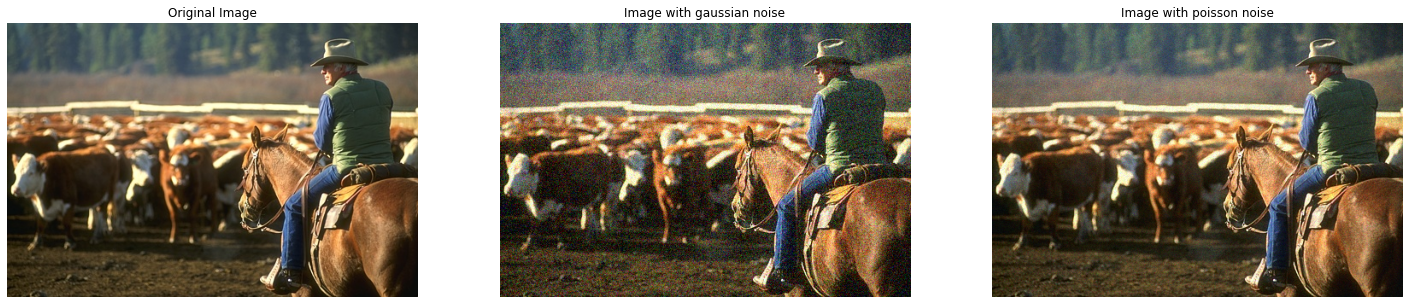

In [79]:
# Image loading
transform = transforms.ToTensor()
dataset = BSDS300_images("data", 25, train=False, transform=transform,noise="Gaussian",download=True)
im_noisy_gaussian,im = dataset.__getitem__(10)

dataset = BSDS300_images("data", 25, train=False, transform=transform,noise="Poisson",download=True)
im_noisy_poisson,im = dataset.__getitem__(10)

# image display
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 10))

ax1.imshow(im.detach().cpu().numpy().transpose((1,2,0)))
ax1.set_title('Original Image')
ax1.axis('off')

ax2.imshow(im_noisy_gaussian.detach().cpu().numpy().transpose((1,2,0)))
ax2.set_title('Image with gaussian noise')
ax2.axis('off')

ax3.imshow(im_noisy_poisson.detach().cpu().numpy().transpose((1,2,0)))
ax3.set_title('Image with poisson noise')
ax3.axis('off');

## Model trained on Gaussian noise

In [80]:
# Define function to calculate PSNR
def calc_psnr(im_true, im):
    im_true = im_true.detach().cpu().numpy().transpose((1,2,0))
    im = im.squeeze(0).detach().cpu().numpy().transpose((1,2,0))
    return cv2.PSNR(im_true, im)

In [81]:
# Define parameters 
steps = 8
n_filters = 48
filter_size = 7
model_path = 'models/joint7.pt'

In [82]:
# Load model 
model = DiffusionNet(T=steps, n_rbf=63, n_channels=3, n_filters=n_filters, filter_size=filter_size).cuda()
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [83]:
# Moving images to CUDA
im = im.cuda()
im_noisy_gaussian = im_noisy_gaussian.cuda()
im_noisy_poisson = im_noisy_poisson.cuda()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Noisy image PSNR :  68.30259597573674
Denoised image PSNR :  79.70691309503015


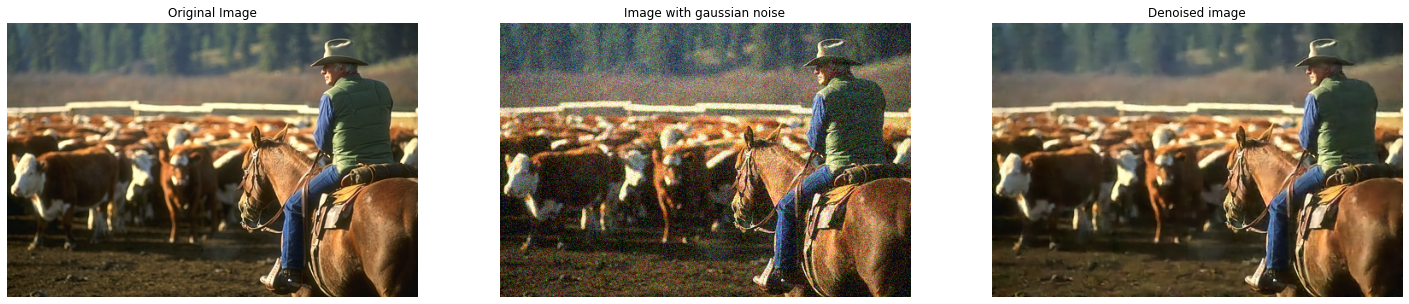

In [100]:
# Gaussian noise with variance 25
psnr_gaussian25 = [] 
preds_gaussian25 = []

im_pred = torch.clone(im_noisy_gaussian)
for i in range(len(model.dnets)):
    with torch.no_grad():
        if i==0 :
            im_pred = model.step(im_pred.unsqueeze(0), im_noisy_gaussian.unsqueeze(0), i)
        else :
            im_pred = model.step(im_pred, im_noisy_gaussian.unsqueeze(0), i)
        preds_gaussian25.append(im_pred.squeeze(0))
    psnr_gaussian25.append(calc_psnr(im, im_pred))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 10))

ax1.imshow(im.detach().cpu().numpy().transpose((1,2,0)))
ax1.set_title('Original Image')
ax1.axis('off')

ax2.imshow(im_noisy_gaussian.detach().cpu().numpy().transpose((1,2,0)))
ax2.set_title('Image with gaussian noise')
ax2.axis('off')

ax3.imshow(preds_gaussian25[-1].detach().cpu().numpy().transpose((1,2,0)))
ax3.set_title('Denoised image')
ax3.axis('off')

plt.savefig('./examples/example.png')
print("Noisy image PSNR : ", cv2.PSNR(im.detach().cpu().numpy().transpose((1,2,0)),im_noisy_gaussian.detach().cpu().numpy().transpose((1,2,0))))
print("Denoised image PSNR : ", psnr_gaussian25[-1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Noisy image PSNR :  77.00119004950801
Denoised image PSNR :  80.71910098551263


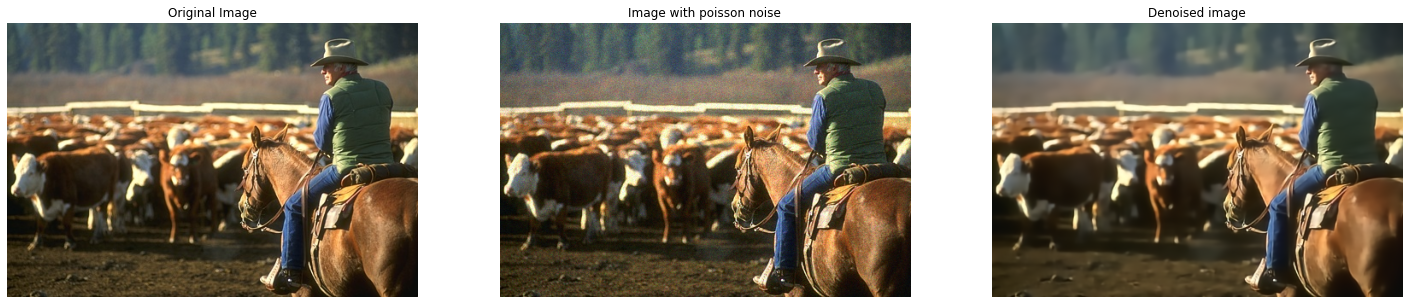

In [85]:
# Poisson noise
psnr_poisson = [] 
preds_poisson = []

im_pred = torch.clone(im_noisy_poisson)
for i in range(len(model.dnets)):
    with torch.no_grad():
        if i==0 :
            im_pred = model.step(im_pred.unsqueeze(0), im_noisy_poisson.unsqueeze(0), i)
        else :
            im_pred = model.step(im_pred, im_noisy_poisson.unsqueeze(0), i)
        preds_poisson.append(im_pred.squeeze(0))
    psnr_poisson.append(calc_psnr(im, im_pred))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 10))

ax1.imshow(im.detach().cpu().numpy().transpose((1,2,0)))
ax1.set_title('Original Image')
ax1.axis('off')

ax2.imshow(im_noisy_poisson.detach().cpu().numpy().transpose((1,2,0)))
ax2.set_title('Image with poisson noise')
ax2.axis('off')

ax3.imshow(preds_poisson[-1].detach().cpu().numpy().transpose((1,2,0)))
ax3.set_title('Denoised image')
ax3.axis('off')

print("Noisy image PSNR : ", cv2.PSNR(im.detach().cpu().numpy().transpose((1,2,0)),im_noisy_poisson.detach().cpu().numpy().transpose((1,2,0))))
print("Denoised image PSNR : ", psnr_poisson[-1])

Files already downloaded


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Noisy image PSNR :  65.37973793123291
Denoised image PSNR :  75.29926499327465


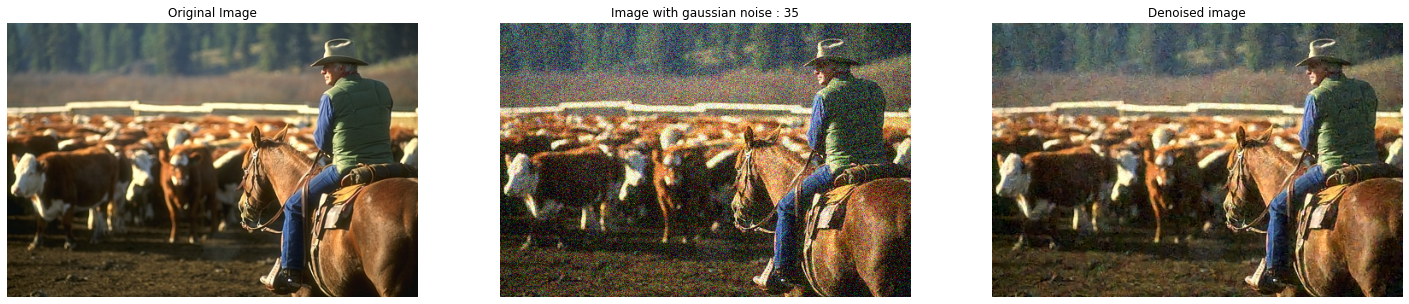

In [86]:
# Gaussian noise with variance 35
dataset = BSDS300_images("data", 35, train=False, transform=transform,noise="Gaussian",download=True)
im_noisy_gaussian_35,im = dataset.__getitem__(10)
im_noisy_gaussian_35 = im_noisy_gaussian_35.cuda()

psnr_gaussian35 = [] 
preds_gaussian35 = []

im_pred = torch.clone(im_noisy_gaussian_35)
for i in range(len(model.dnets)):
    with torch.no_grad():
        if i==0 :
            im_pred = model.step(im_pred.unsqueeze(0), im_noisy_gaussian_35.unsqueeze(0), i)
        else :
            im_pred = model.step(im_pred, im_noisy_gaussian_35.unsqueeze(0), i)
        preds_gaussian35.append(im_pred.squeeze(0))
    psnr_gaussian35.append(calc_psnr(im, im_pred))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 10))

ax1.imshow(im.detach().cpu().numpy().transpose((1,2,0)))
ax1.set_title('Original Image')
ax1.axis('off')

ax2.imshow(im_noisy_gaussian_35.detach().cpu().numpy().transpose((1,2,0)))
ax2.set_title('Image with gaussian noise : 35')
ax2.axis('off')

ax3.imshow(preds_gaussian35[-1].detach().cpu().numpy().transpose((1,2,0)))
ax3.set_title('Denoised image')
ax3.axis('off')

print("Noisy image PSNR : ", cv2.PSNR(im.detach().cpu().numpy().transpose((1,2,0)),im_noisy_gaussian_35.detach().cpu().numpy().transpose((1,2,0))))
print("Denoised image PSNR : ", psnr_gaussian35[-1])

## Model trained on Poisson noise

In [87]:
# Define parameters 
steps = 8
n_filters = 48
filter_size = 7
model_path = 'models/new_joint7_poisson.pt'

In [88]:
# Load model 
model_2 = DiffusionNet(T=steps, n_rbf=63, n_channels=3, n_filters=n_filters, filter_size=filter_size).cuda()
model_2.load_state_dict(torch.load(model_path))

<All keys matched successfully>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Noisy image PSNR :  77.00119004950801
Denoised image PSNR Model 1:  80.71910098551263
Denoised image PSNR Model 2:  82.96758683770989


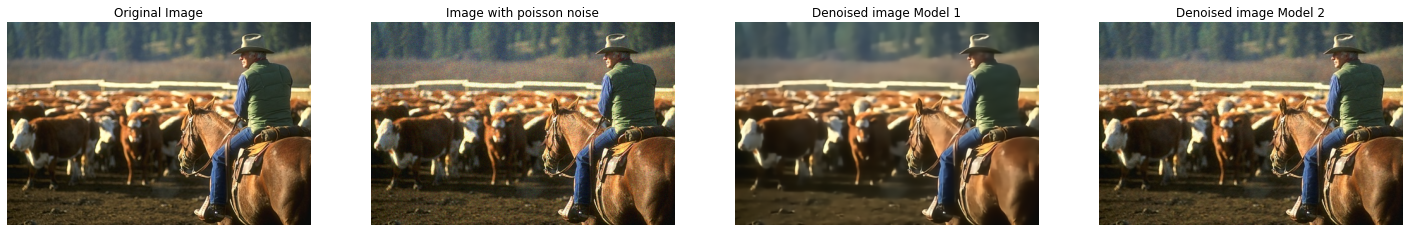

In [91]:
# Poisson noise
psnr_poisson_2 = [] 
preds_poisson_2 = []

im_pred = torch.clone(im_noisy_poisson)
for i in range(len(model.dnets)):
    with torch.no_grad():
        if i==0 :
            im_pred = model_2.step(im_pred.unsqueeze(0), im_noisy_poisson.unsqueeze(0), i)
        else :
            im_pred = model_2.step(im_pred, im_noisy_poisson.unsqueeze(0), i)
        preds_poisson_2.append(im_pred.squeeze(0))
    psnr_poisson_2.append(calc_psnr(im, im_pred))

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(25, 10))

ax1.imshow(im.detach().cpu().numpy().transpose((1,2,0)))
ax1.set_title('Original Image')
ax1.axis('off')

ax2.imshow(im_noisy_poisson.detach().cpu().numpy().transpose((1,2,0)))
ax2.set_title('Image with poisson noise')
ax2.axis('off')

ax3.imshow(preds_poisson[-1].detach().cpu().numpy().transpose((1,2,0)))
ax3.set_title('Denoised image Model 1')
ax3.axis('off')

ax4.imshow(preds_poisson_2[-1].detach().cpu().numpy().transpose((1,2,0)))
ax4.set_title('Denoised image Model 2')
ax4.axis('off')

print("Noisy image PSNR : ", cv2.PSNR(im.detach().cpu().numpy().transpose((1,2,0)),im_noisy_poisson.detach().cpu().numpy().transpose((1,2,0))))
print("Denoised image PSNR Model 1: ", psnr_poisson[-1])
print("Denoised image PSNR Model 2: ", psnr_poisson_2[-1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Noisy image PSNR :  68.30259597573674
Denoised image PSNR Model 1:  79.70691309503015
Denoised image PSNR Model 2:  73.99603940351709


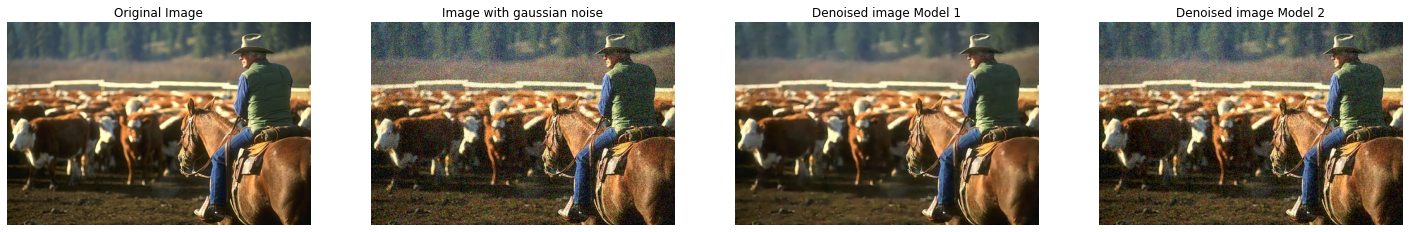

In [93]:
# Gaussian noise with variance 25
psnr_gaussian25_2 = [] 
preds_gaussian25_2 = []

im_pred = torch.clone(im_noisy_gaussian)
for i in range(len(model.dnets)):
    with torch.no_grad():
        if i==0 :
            im_pred = model_2.step(im_pred.unsqueeze(0), im_noisy_gaussian.unsqueeze(0), i)
        else :
            im_pred = model_2.step(im_pred, im_noisy_gaussian.unsqueeze(0), i)
        preds_gaussian25_2.append(im_pred.squeeze(0))
    psnr_gaussian25_2.append(calc_psnr(im, im_pred))

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(25, 10))

ax1.imshow(im.detach().cpu().numpy().transpose((1,2,0)))
ax1.set_title('Original Image')
ax1.axis('off')

ax2.imshow(im_noisy_gaussian.detach().cpu().numpy().transpose((1,2,0)))
ax2.set_title('Image with gaussian noise')
ax2.axis('off')

ax3.imshow(preds_gaussian25[-1].detach().cpu().numpy().transpose((1,2,0)))
ax3.set_title('Denoised image Model 1')
ax3.axis('off')

ax4.imshow(preds_gaussian25_2[-1].detach().cpu().numpy().transpose((1,2,0)))
ax4.set_title('Denoised image Model 2')
ax4.axis('off')

print("Noisy image PSNR : ", cv2.PSNR(im.detach().cpu().numpy().transpose((1,2,0)),im_noisy_gaussian.detach().cpu().numpy().transpose((1,2,0))))
print("Denoised image PSNR Model 1: ", psnr_gaussian25[-1])
print("Denoised image PSNR Model 2: ", psnr_gaussian25_2[-1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Noisy image PSNR :  65.37973793123291
Denoised image PSNR Model 1:  75.29926499327465
Denoised image PSNR Model 2:  70.38718709061777


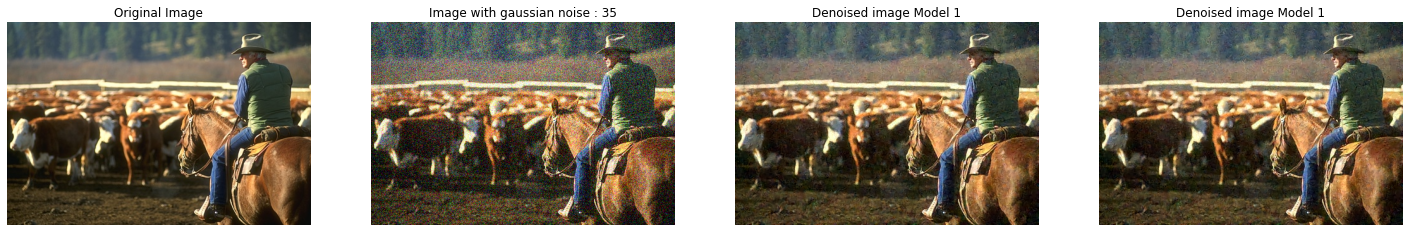

In [94]:
# Gaussian noise with variance 35
psnr_gaussian35_2 = [] 
preds_gaussian35_2 = []

im_pred = torch.clone(im_noisy_gaussian_35)
for i in range(len(model.dnets)):
    with torch.no_grad():
        if i==0 :
            im_pred = model_2.step(im_pred.unsqueeze(0), im_noisy_gaussian_35.unsqueeze(0), i)
        else :
            im_pred = model_2.step(im_pred, im_noisy_gaussian_35.unsqueeze(0), i)
        preds_gaussian35_2.append(im_pred.squeeze(0))
    psnr_gaussian35_2.append(calc_psnr(im, im_pred))

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(25, 10))

ax1.imshow(im.detach().cpu().numpy().transpose((1,2,0)))
ax1.set_title('Original Image')
ax1.axis('off')

ax2.imshow(im_noisy_gaussian_35.detach().cpu().numpy().transpose((1,2,0)))
ax2.set_title('Image with gaussian noise : 35')
ax2.axis('off')

ax3.imshow(preds_gaussian35[-1].detach().cpu().numpy().transpose((1,2,0)))
ax3.set_title('Denoised image Model 1')
ax3.axis('off')

ax4.imshow(preds_gaussian35[-1].detach().cpu().numpy().transpose((1,2,0)))
ax4.set_title('Denoised image Model 1')
ax4.axis('off')

print("Noisy image PSNR : ", cv2.PSNR(im.detach().cpu().numpy().transpose((1,2,0)),im_noisy_gaussian_35.detach().cpu().numpy().transpose((1,2,0))))
print("Denoised image PSNR Model 1: ", psnr_gaussian35[-1])
print("Denoised image PSNR Model 2: ", psnr_gaussian35_2[-1])

## Comparison with the simple Perona-Malik diffusion

In [95]:
# Definig functions needed for Perona-Malik
c_functions = [lambda x, k : 1-np.exp((-x**2)/(k**2)) ,lambda x, k : ((1+x**2)/k**2)**(-1/2),lambda x, k : ((1+x**2)/k**2)**(-1) ]

def get_gradient(u):
    return np.array([cv2.Sobel(u,ddepth=-1,dx=1,dy=0,ksize=3), cv2.Sobel(u,ddepth=-1,dx=0,dy=1,ksize=3)])

def PeronaMalikDiffusion(u, N, Lambda, c, k):
    uf = u.copy()
    psnr_hist = []
    for i in range(N):
      gradient = get_gradient(uf) 
      gradient_norm = np.linalg.norm(gradient)
      
      div_term = c(gradient_norm,k) * gradient
      div = get_gradient(div_term[0])[0] + get_gradient(div_term[1])[1] # get div term by computing the gradient

      uf = uf + Lambda*div
      psnr_hist.append(cv2.PSNR(u,uf))
    return uf,psnr_hist

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Model 1 Denoised image PSNR :  79.70691309503015
Model 2 Denoised image PSNR :  73.99603940351709
Perona Malik Denoised image PSNR :  68.30686379783127


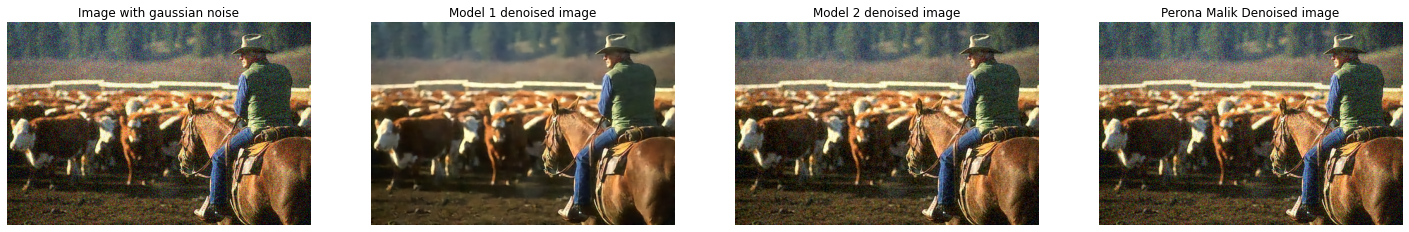

In [99]:
# Perona Malik
denoised_pm,psnr_hist_pm = PeronaMalikDiffusion(im_noisy_gaussian.detach().cpu().numpy().transpose((1,2,0)), 50, 0.02, c_functions[1], 0.01)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(25, 10))

ax1.imshow(im_noisy_gaussian.detach().cpu().numpy().transpose((1,2,0)))
ax1.set_title('Image with gaussian noise')
ax1.axis('off')

ax2.imshow(preds_gaussian25[-1].detach().cpu().numpy().transpose((1,2,0)))
ax2.set_title('Model 1 denoised image')
ax2.axis('off')

ax3.imshow(preds_gaussian25_2[-1].detach().cpu().numpy().transpose((1,2,0)))
ax3.set_title('Model 2 denoised image')
ax3.axis('off')

ax4.imshow(denoised_pm)
ax4.set_title('Perona Malik Denoised image')
ax4.axis('off')

print("Model 1 Denoised image PSNR : ", psnr_gaussian25[-1])
print("Model 2 Denoised image PSNR : ", psnr_gaussian25_2[-1])
print("Perona Malik Denoised image PSNR : ", cv2.PSNR(im.detach().cpu().numpy().transpose((1,2,0)),denoised_pm))

## Inference Time

In [ ]:
# Gaussian noise with variance 25
inference_time = 0

im_pred = torch.clone(im_noisy_gaussian)
for i in range(len(model.dnets)):
    delta = 0
    with torch.no_grad():
        if i==0 :
            start_time = time()
            im_pred = model.step(im_pred.unsqueeze(0), im_noisy_gaussian.unsqueeze(0), i)
            end_time = time()
        else :
            start_time = time()
            im_pred = model.step(im_pred, im_noisy_gaussian.unsqueeze(0), i)
            end_time = time()
    inference_time += end_time - start_time

print("Image size : ",  np.shape(im))
print("Inference time : ", inference_time)